In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

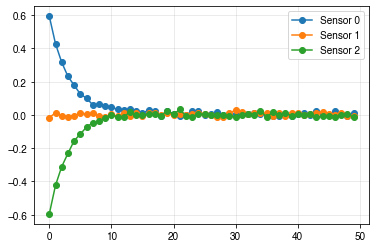

In [2]:
xmin, xmax, dx = 0, 1, 0.01
tmin, tmax = 0, 0.1
x = np.arange(xmin, xmax, dx)
dx = x[1] - x[0]
r = 0.5
dt = r * dx**2
t = np.arange(tmin, tmax, dt)
nx, nt = len(x), len(t)

utrue = np.zeros((nt, nx))

# True initial
utrue[0] = np.sin(4*np.pi*x)
for i in range(nt - 1):
    for j in range(nx - 1):    
        utrue[i+1, j] = ((1-2*r) * utrue[i, j] + r * (utrue[i, j-1] + utrue[i, j+1]))

# Sensor locations
sx = np.array([0.2, 0.5, 0.8])
ns = len(sx)

# Sensor sampling interval
ss = 0.002
st = np.arange(0, tmax, ss)

# Sensor data
sxi = [np.where(x == sxval)[0][0] for sxval in sx]
sd = utrue[::int(ss/dt), sxi]
noise = 0.01 * np.random.normal(size=sd.shape)
sd = sd + noise

for i in range(ns):
    plt.plot(sd[:, i], '-o', label='Sensor %s' % i)
plt.legend()
plt.show()

In [3]:
H = np.zeros((ns, nx))
for i, idx in enumerate(sxi):
    H[i, idx] = 1.0

a = 0.5  # correlation distance
sigmab = 1.0
sigmao = 0.1

B = sigmab * np.exp(-distance_matrix(x.reshape(-1, 1), x.reshape(-1, 1))**2 / a**2)
R = np.diag(np.full_like(sx, sigmao))
W = B @ H.T @ np.linalg.inv(R + H @ B @ H.T)
    
# Our initial guess
u = np.zeros((nt, nx))
for i in range(nt - 1):
    tval = t[i]
    if tval in st:
        deltav = sd[list(st).index(tval)] - H @ u[i]
        u[i] = u[i] + W @ deltav
    
    # Simulate
    for j in range(nx - 1):    
        u[i+1, j] = ((1-2*r) * u[i, j] + r * (u[i, j-1] + u[i, j+1]))

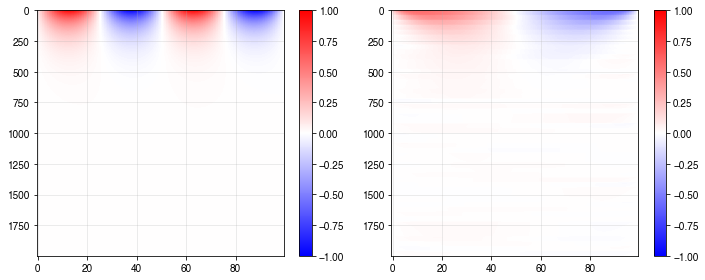

In [4]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(utrue, aspect='auto', cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(u, aspect='auto', cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()

plt.tight_layout()
plt.show()

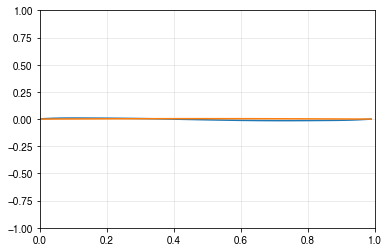

In [5]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-1, 1))
line1, = ax.plot([], [])
line2, = ax.plot([], [])

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2


def animate(i):
    line1.set_data(x, u[i])
    line2.set_data(x, utrue[i])
    return line1, line2


anim = FuncAnimation(fig, animate, init_func=init,
                     frames=range(0, nt, 10), interval=20, blit=True)
HTML(anim.to_html5_video())

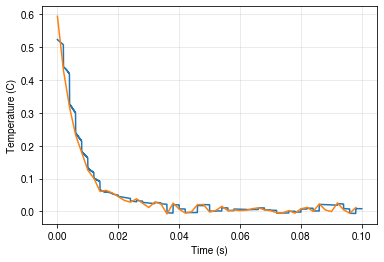

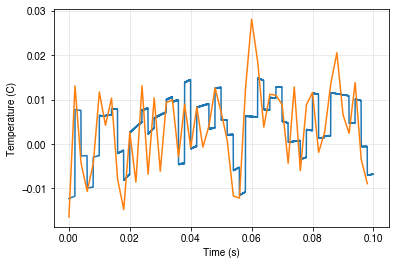

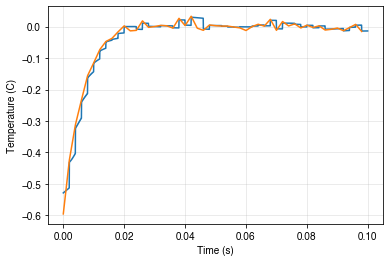

In [6]:
plt.plot(t, u[:, 20])
plt.plot(st, sd[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()

plt.plot(t, u[:, 50])
plt.plot(st, sd[:, 1])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()

plt.plot(t, u[:, 80])
plt.plot(st, sd[:, 2])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()